In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
air_traffic_data = pd.read_csv("SF_Air_Traffic_Passenger_Statistics_Transformed.csv")


In [3]:
air_traffic_data.head()


,Date,Total Passenger Count
0,200601,2448889
1,200602,2223024
2,200603,2708778
3,200604,2773293
4,200605,2829000


In [4]:
air_traffic_data.shape


(132, 2)

In [5]:
air_traffic_data.dtypes


,0
Date,int64
Total Passenger Count,int64


In [6]:
air_traffic_data.set_index('Date',inplace = True)
air_traffic_data.shape

(132, 1)

   the selected cell, air_traffic_data.shape will show the number of rows and columns in the air_traffic_data DataFrame after setting the 'Date' column as the index. Since 'Date' was removed as a regular column, the shape changes from (132, 2) to (132, 1).

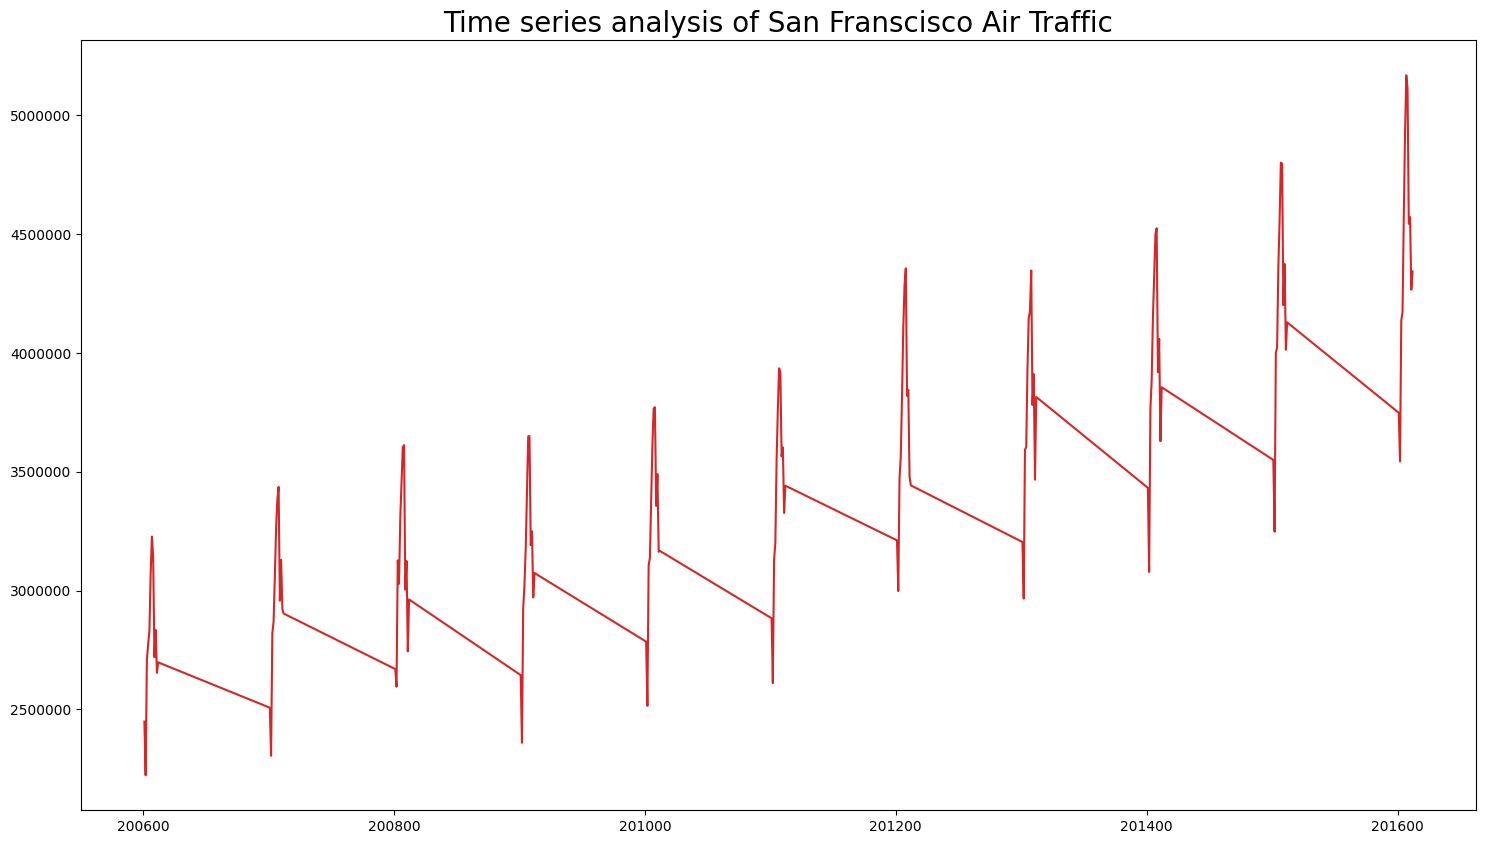

In [7]:
plt.figure(figsize= (18,10))

plt.plot(air_traffic_data.index, air_traffic_data['Total Passenger Count'], color='tab:red')
plt.title("Time series analysis of San Franscisco Air Traffic",fontsize = 20)
plt.ticklabel_format(style='plain', axis='y')

We can see a clear increasing trend in the total passenger count over the years. There's also a noticeable seasonal pattern, with peaks and dips occurring at regular intervals each year. The peaks likely correspond to busier travel seasons.

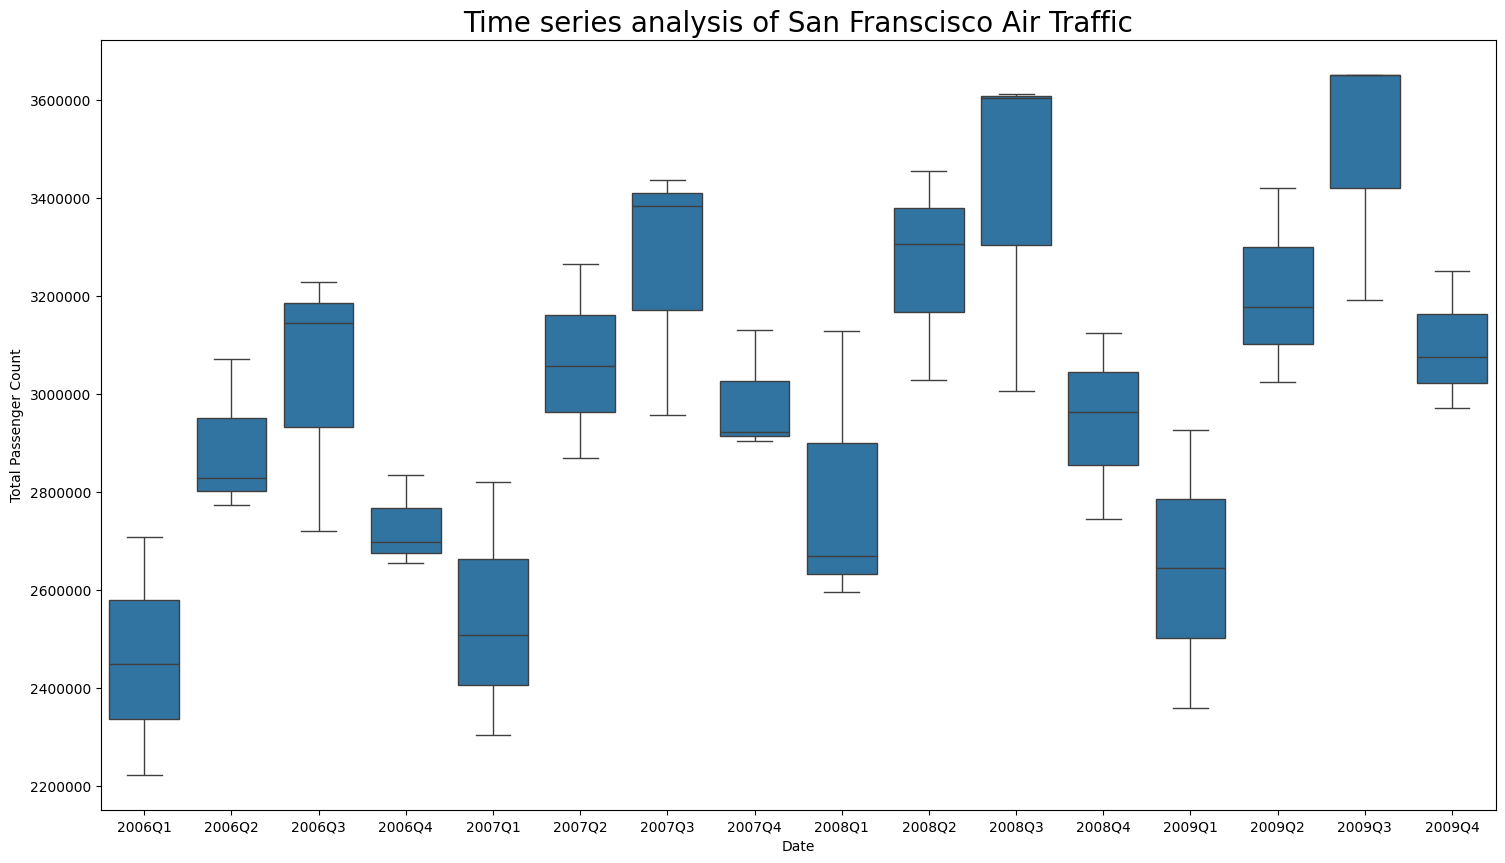

In [8]:
plt.figure(figsize= (18,10))

air_traffic_data.index = pd.to_datetime(air_traffic_data.index, format='%Y%m')

data_subset = air_traffic_data[air_traffic_data.index < '2010-01-01']

ax = sns.boxplot(data = data_subset , x= pd.PeriodIndex(data_subset.index, freq='Q'),
                 y= data_subset['Total Passenger Count'])

ax.set_title("Time series analysis of San Franscisco Air Traffic",fontsize = 20)

plt.ticklabel_format(style='plain', axis='y')

shows the distribution of the "Total Passenger Count" for each quarter of the year, specifically for the years before 2010.

From this plot, you can see:

Median (the line inside the box): The typical passenger count for that quarter.
Box: The middle 50% of the data (from the 25th to the 75th percentile) for that quarter.
Whiskers (the lines extending from the box): The range of most of the data, excluding outliers.
Outliers (individual points): Any data points that fall significantly outside the typical range for that quarter.
By comparing the boxes and whiskers across different quarters, you can clearly see the seasonal variations in air traffic. For example, you can observe which quarters tend to have higher or lower passenger counts and how much the passenger count varies within each quarter.



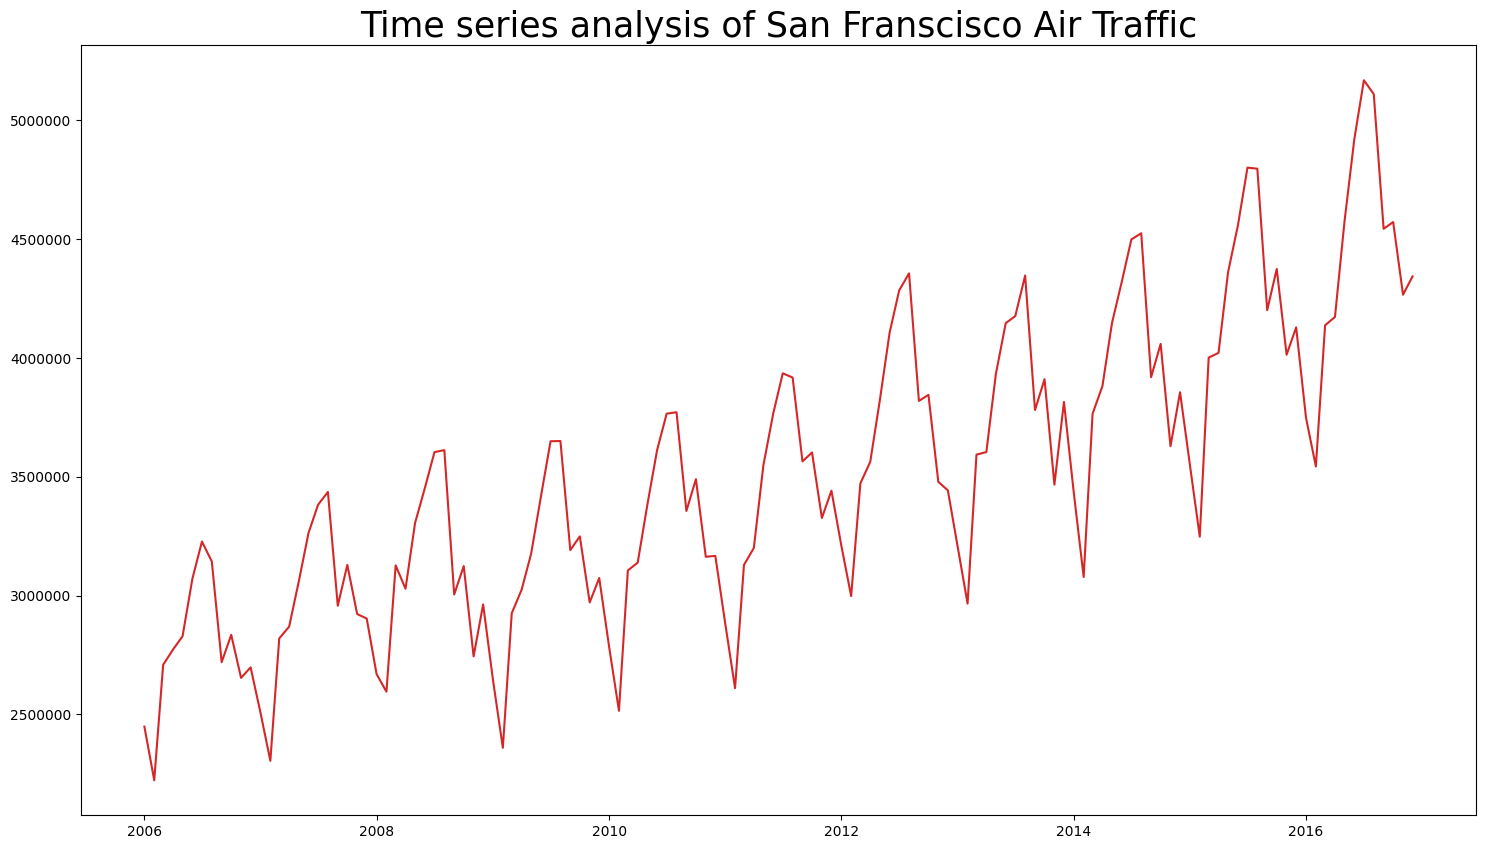

In [9]:
plt.figure(figsize= (18,10))

plt.plot(air_traffic_data.index, air_traffic_data['Total Passenger Count'], color='tab:red')
plt.title("Time series analysis of San Franscisco Air Traffic",fontsize = 25)
plt.ticklabel_format(style='plain', axis='y')

Upward Trend: There's a clear overall increase in the total passenger count from the beginning of the dataset to the end. This suggests growing air travel over the years.
Seasonality: You can see a consistent pattern of peaks and valleys within each year. This indicates that certain times of the year are busier for air travel than others (likely corresponding to holiday periods or summer vacation).
Magnitude of Change: The plot allows us to see the magnitude of the seasonal fluctuations and how the overall passenger numbers have grown over the entire period

The resulting plot shows the overall trend and seasonal patterns in the air traffic data from the beginning to the end of the dataset. You can visually see how the passenger count has changed over the years and observe the recurring peaks and dips within each year.

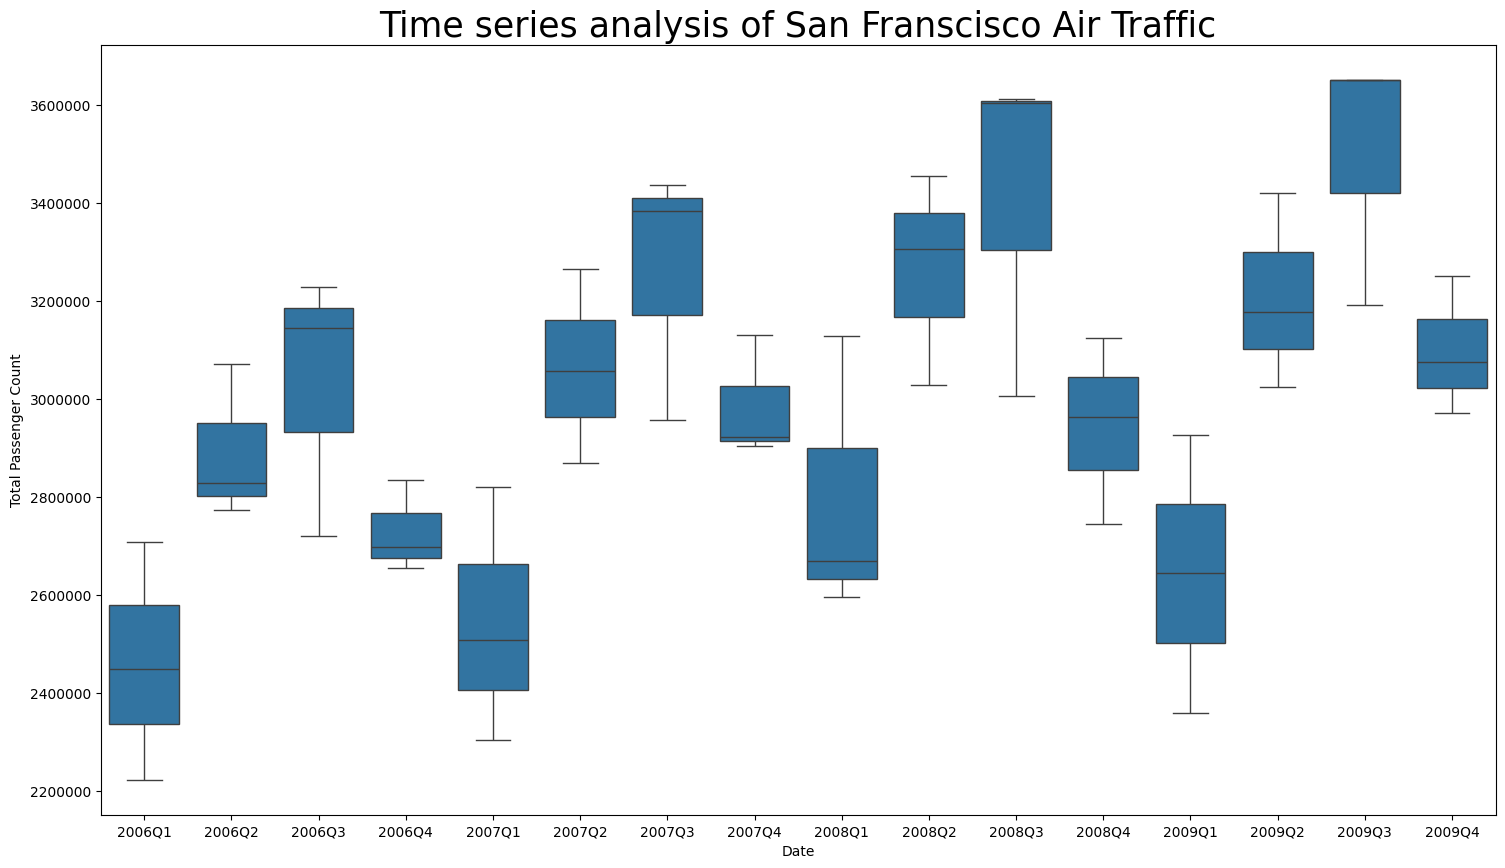

In [10]:
plt.figure(figsize= (18,10))

data_subset = air_traffic_data[air_traffic_data.index < '2010-01-01']

ax = sns.boxplot(data = data_subset , x= pd.PeriodIndex(data_subset.index, freq='Q'), #air_traffic_data['Date'].dt.month,
                 y= data_subset['Total Passenger Count'])

ax.set_title("Time series analysis of San Franscisco Air Traffic",fontsize = 25)

plt.ticklabel_format(style='plain', axis='y')

data = data_subset: Specifies the data to be used for the plot.
x= pd.PeriodIndex(data_subset.index, freq='Q'): This sets the x-axis. It converts the datetime index of the data_subset into a PeriodIndex with a quarterly frequency ('Q'). This groups the data by quarter for the boxplot.
y= data_subset['Total Passenger Count']: This sets the y-axis to the 'Total Passenger Count' column.

What we get from looking at these boxes is a clear picture of which times of the year are busiest for air travel and which are slower.

Taller boxes and higher lines: Mean more variation in passenger numbers during that quarter, or that the typical passenger numbers were higher.
Shorter boxes and lower lines: Mean less variation or lower typical passenger numbers.
You can easily see that some quarters consistently have higher boxes than others. This visually confirms that there's a regular "up and down" pattern in air traffic throughout the year – that's the seasonality we talked about before. This plot just shows that seasonality more clearly for the earlier years in the dataset.



## Weather data

In [11]:
weather_data = pd.read_csv("DailyDelhiClimate.csv")
weather_data.head()

,date,meantemp
0,01/01/2013,10.000000
1,02/01/2013,7.400000
2,03/01/2013,7.166667
3,04/01/2013,8.666667
4,05/01/2013,6.000000


In [12]:
weather_data.set_index('date', inplace = True)


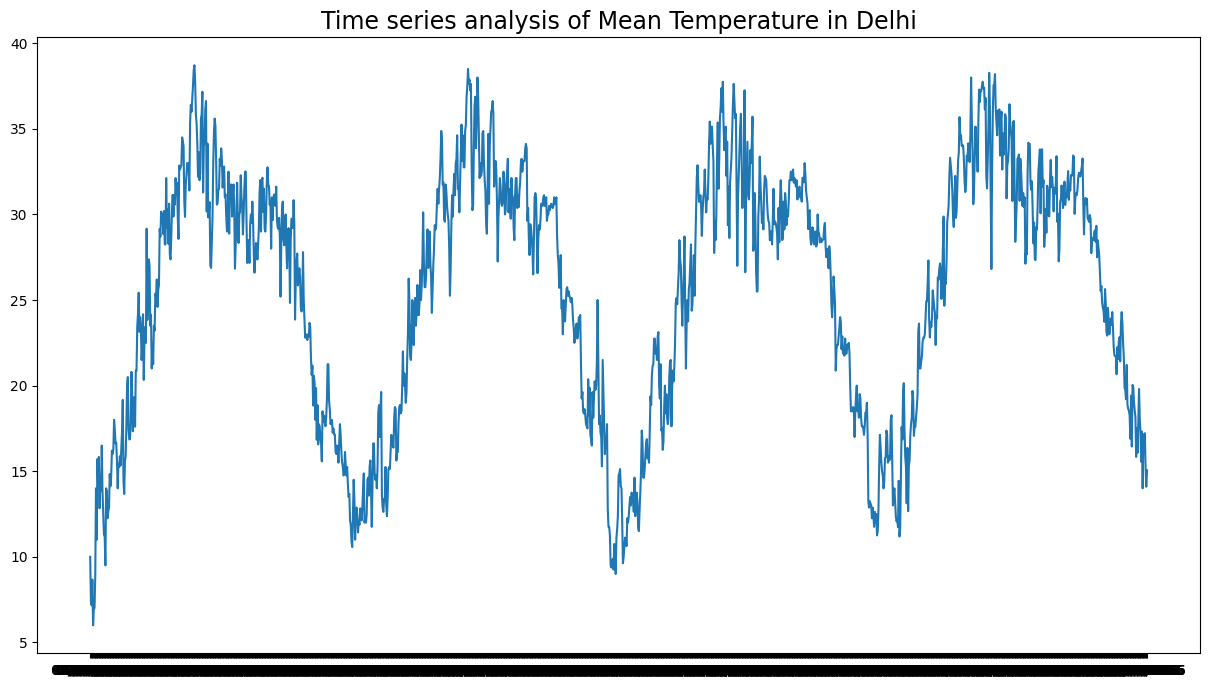

In [13]:
plt.figure(figsize= (15,8))

plt.plot(weather_data.index, weather_data['meantemp'], color='tab:blue')
plt.title("Time series analysis of Mean Temperature in Delhi",fontsize = 17)
plt.ticklabel_format(style='plain', axis='y')

Here's what we can typically infer from such a plot:

Seasonality: The most prominent feature is the repeating up-and-down pattern. This indicates that there are regular periods of higher temperatures (likely summer) and lower temperatures (likely winter) each year.
Temperature Range: The plot shows the range of mean temperatures experienced over the period covered by the data. You can see the highest and lowest temperatures reached.
Consistency of Seasons: The regularity of the peaks and valleys suggests that the seasonal temperature changes are consistent from year to year within the dataset.
Absence of Strong Trend: Unlike the air traffic data which showed a clear upward trend, this temperature data appears to fluctuate around a relatively stable level over the years shown, without a strong long-term increasing or decreasing trend in the mean temperature itself.
In summary, the plot visually confirms the expected seasonal variations in temperature in Delhi and provides a sense of the typical temperature range throughout the year.

##Decompose Timeseries using Multiplicative model


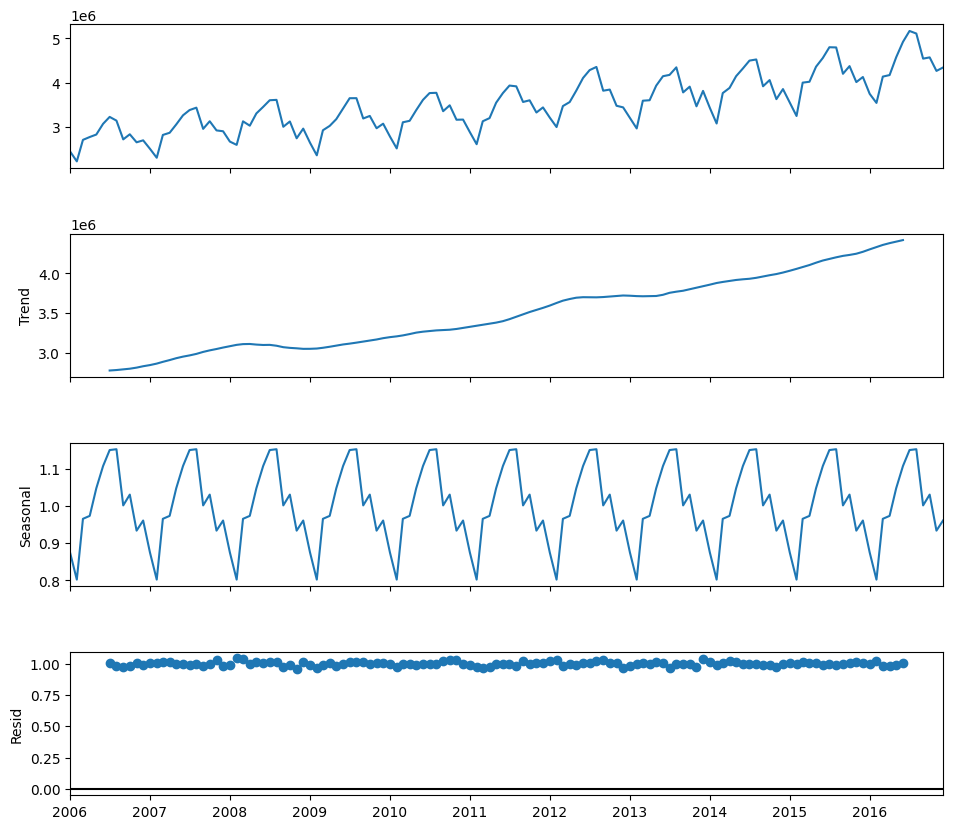

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_multi = seasonal_decompose(air_traffic_data,
                                              model='multiplicative', period = 12)

fig = decomposition_multi.plot()
fig.set_size_inches((10, 9))
plt.show()

Observed: This is the original time series data you started with – the total passenger count over time. It shows the combined effect of trend, seasonality, and any remaining irregular components.
Trend: This plot shows the underlying long-term movement of the time series. It smooths out the seasonal fluctuations and highlights the overall upward or downward direction of the data over time. In your air traffic data, you can see a clear upward trend, indicating a general increase in passenger numbers over the years.
Seasonal: This plot isolates the repeating pattern that occurs within a fixed period (in this case, 12 months, as specified by period=12). It shows how the data consistently deviates from the trend at specific points within each year. For your air traffic data, you can see the clear seasonal peaks and dips that repeat annually.
Residual: This plot shows what's left after the trend and seasonal components have been removed from the original data. It represents the irregular or random fluctuations in the time series that are not explained by the trend or seasonality. If the decomposition is a good fit, the residuals should appear random and without any clear pattern.
In a multiplicative decomposition, the original data is modeled as the product of the trend, seasonal, and residual components:

`Observed = Trend * Seasonal * Residual`

This type of model is often suitable when the magnitude of the seasonal fluctuations increases as the trend increases, which seems to be the case with your air traffic data based on the original plot.

##Decompose Timeseries using Additive model


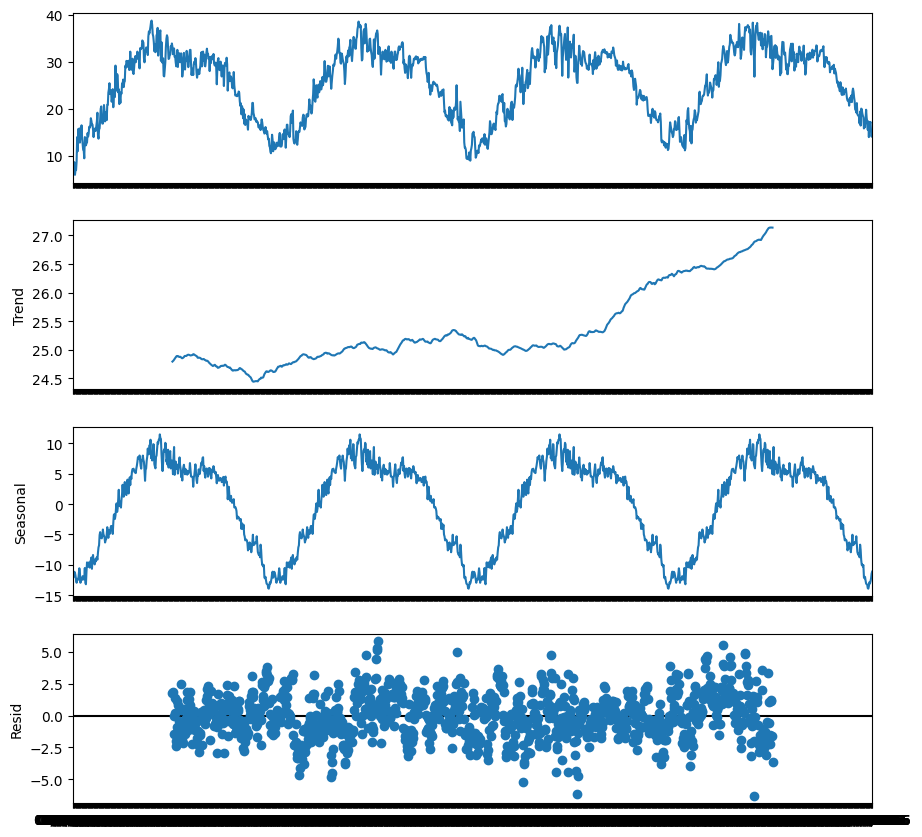

In [15]:
decomposition_add = seasonal_decompose(weather_data,
                                              model='additive',period = 365)

fig = decomposition_add.plot()
fig.set_size_inches((10, 9))
plt.show()

Let's look at what each part of the additive decomposition plot for the weather data shows:

Observed: This top plot is your original mean temperature time series. It shows the daily temperature fluctuations over the years, including both the overall yearly pattern and the smaller day-to-day variations.
Trend: This plot shows the long-term movement of the mean temperature. It smooths out the seasonal ups and downs to reveal any gradual increase or decrease in temperature over the entire period. In this plot, you can see a slight upward trend over the years, suggesting a gradual warming.
Seasonal: This plot isolates the consistent pattern that repeats every 365 days (because we set period=365). It shows the typical temperature variation within a year, highlighting the expected hot periods (summer) and cold periods (winter) and how much the temperature usually deviates from the trend during those times. You can see the clear annual cycle here.
Residual: This plot shows the remaining variation in the temperature data after the trend and seasonal components have been removed. These are the irregular or random fluctuations that aren't explained by the long-term trend or the consistent yearly pattern. If the additive model is a good fit, these residuals should appear random, without any obvious patterns remaining.
In an additive decomposition, the original data is considered to be the sum of these components:

`Observed = Trend + Seasonal + Residual`

This model is appropriate for the temperature data because the magnitude of the seasonal temperature swings appears to be relatively consistent over the years, regardless of the overall temperature level.

## Stock Data

In [16]:
stock_data = pd.read_csv("MTNOY.csv")
stock_data = stock_data[['Date','Close']]

In [17]:
stock_data.head()


,Date,Close
0,2010-02-01,14.70
1,2010-02-02,14.79
2,2010-02-03,14.60
3,2010-02-04,14.10
4,2010-02-05,14.28


In [18]:
stock_data.shape

(1490, 2)

In [19]:
stock_data.dtypes

,0
Date,object
Close,float64


In [20]:
stock_data['Date']= pd.to_datetime(stock_data['Date'], format = "%Y-%m-%d")
stock_data['Date'].head()

,Date
0,2010-02-01
1,2010-02-02
2,2010-02-03
3,2010-02-04
4,2010-02-05


In [21]:
stock_data.set_index('Date',inplace = True)
stock_data.shape

(1490, 1)

Setting Date as an index

Text(0.5, 1.0, 'Time series analysis of MTN Group Limited Stocks')

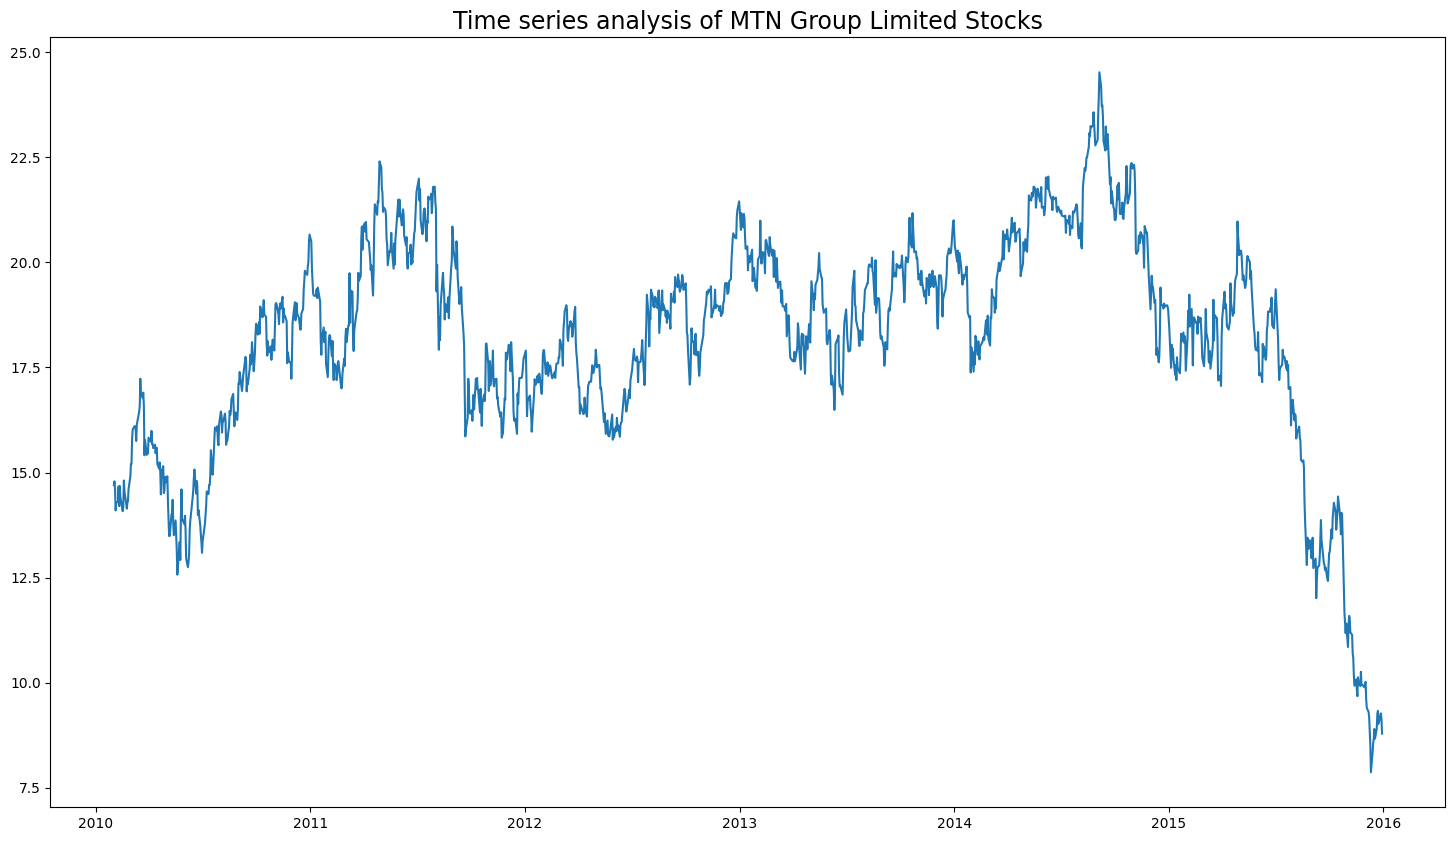

In [22]:

plt.figure(figsize= (18,10))

plt.plot(stock_data.index, stock_data['Close'],color='tab:blue')
plt.title("Time series analysis of MTN Group Limited Stocks",fontsize = 17)

The time series plot of the MTN Group Limited stock prices, we can observe several things:

Overall Trend: The plot shows the general direction of the stock price over the entire period. You can see if there's an upward trend (prices are generally increasing), a downward trend (prices are generally decreasing), or if the prices are relatively stable. In this plot, we can see periods of both increase and decrease, with significant volatility.
Volatility: The plot visually represents how much the stock price fluctuates over time. Large, rapid up and down movements indicate high volatility, while a smoother line indicates lower volatility. The MTN stock appears to have experienced periods of notable volatility.
Peaks and Troughs: You can identify the highest (peaks) and lowest (troughs) points in the stock price over the observed period.
Significant Events: While not explicitly shown on the plot without external information, sharp drops or rises could potentially correspond to significant news or events related to the company or the market.
Periods of Growth and Decline: You can visually identify periods where the stock price was generally increasing (growth) and periods where it was generally decreasing (decline).
In summary, the plot provides a visual overview of the stock's performance over time, allowing us to see its historical price movements, volatility, and overall trend.

In [23]:
moving_data = stock_data.rolling(window=4)
moving_average_data = moving_data.mean()
moving_average_data.head()

,Close
Date,
2010-02-01,NaN
2010-02-02,NaN
2010-02-03,NaN
2010-02-04,14.5475
2010-02-05,14.4425


This code calculates a rolling mean (moving average) for the 'Close' price in the stock_data DataFrame using a window of 4.

Here's a breakdown:

moving_data = stock_data.rolling(window=4): This creates a rolling window object.
stock_data.rolling(): This is a pandas method that provides rolling window calculations.
window=4: This specifies the size of the rolling window. In this case, it means that for each data point, the calculation will be based on the current data point and the previous 3 data points (a total of 4).
moving_average_data = moving_data.mean(): This calculates the mean within each rolling window. For each point in time, it calculates the average of the 'Close' prices within the preceding 4-day window (including the current day).
moving_average_data.head(): This displays the first few rows of the resulting moving_average_data DataFrame. You will notice that the first few rows will have NaN values because there aren't enough preceding data points to fill the 4-day window.
The result, moving_average_data, is a new DataFrame containing the 4-day rolling mean of the 'Close' price. Rolling averages are often used to smooth out short-term fluctuations in time series data and to identify underlying trends. A shorter window (like 4 days) will show more detail and be closer to the original data, while a longer window will produce a smoother line that highlights longer-term trends.

Text(0.5, 1.0, 'Time series analysis of MTN Group Limited Stocks VS Moving Average')

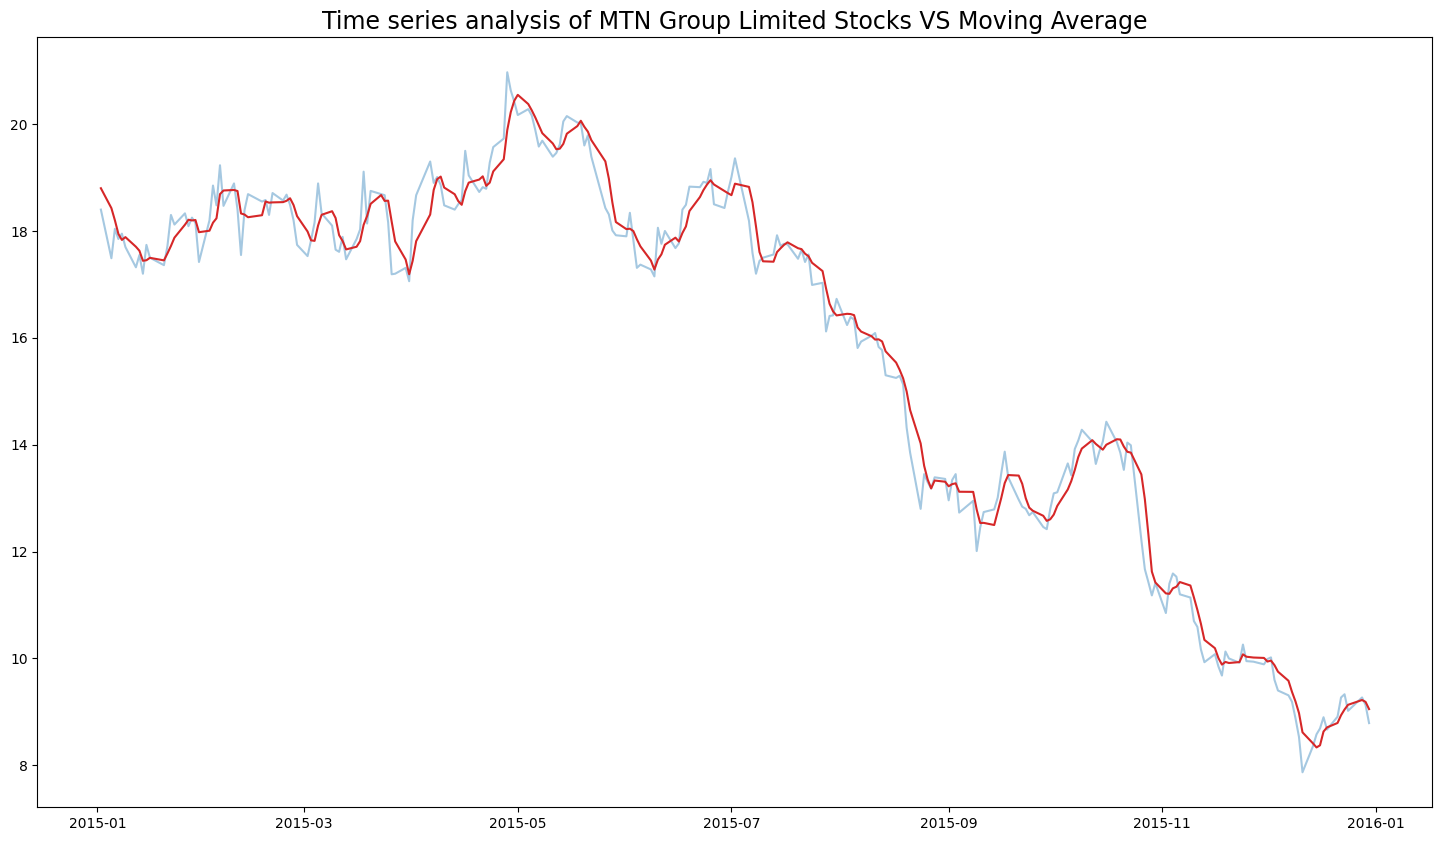

In [24]:
plt.figure(figsize= (18,10))

stock_data_subset = stock_data[stock_data.index>= '2015-01-01']
moving_average_data_subset = moving_average_data[moving_average_data.index>= '2015-01-01']


plt.plot(stock_data_subset.index, stock_data_subset['Close'],color='tab:blue',alpha = 0.4)
plt.plot(moving_average_data_subset.index,moving_average_data_subset['Close'],color='tab:red')
plt.title("Time series analysis of MTN Group Limited Stocks VS Moving Average",fontsize = 17)

Here's what you can observe:

Smoothing Effect: The red line (the 4-day moving average) is much smoother than the semi-transparent blue line (the original closing prices). This demonstrates how the moving average reduces the noise from short-term price swings.
Following the Trend: The moving average line generally follows the overall trend of the original stock price data. When the stock price is increasing, the moving average also tends to increase, and when the stock price is decreasing, the moving average tends to decrease.
Lag: The moving average line will typically lag behind the original price data. This is because it's an average of past prices, so it reacts to changes in the trend with a slight delay. You can see this lag in the plot, where the peaks and valleys of the moving average occur slightly after the corresponding peaks and valleys in the original price data.
Identifying Short-Term Trends: While a 4-day moving average is a relatively short window, it can still help to identify short-term trends in the data that might be harder to see in the raw daily prices.
In essence, the plot visually confirms that the moving average is a useful tool for smoothing time series data and highlighting the underlying trend.

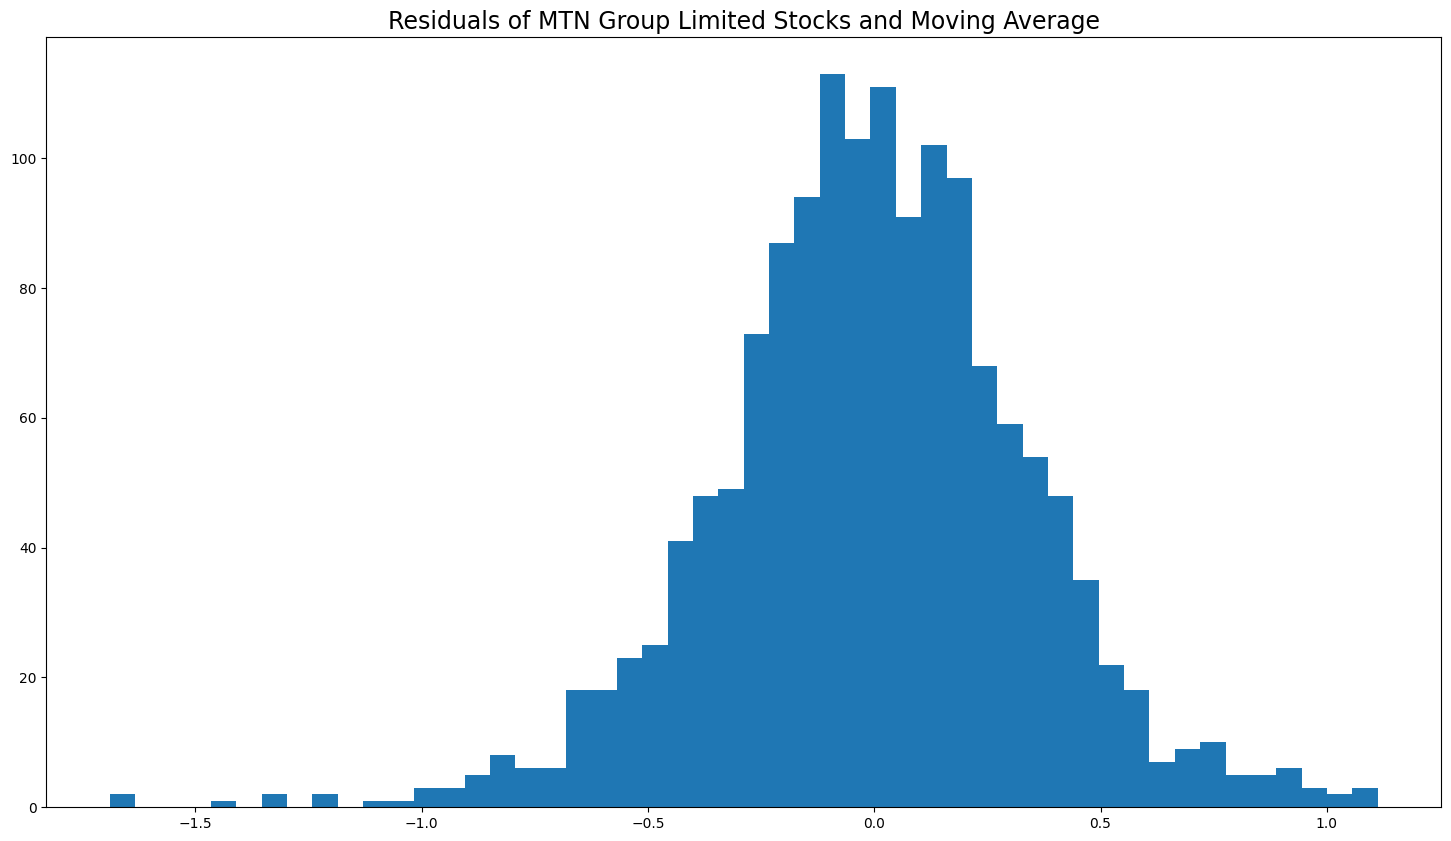

In [25]:
plt.figure(figsize= (18,10))

residuals = stock_data - moving_average_data
plt.hist(residuals, bins=50)
plt.title("Residuals of MTN Group Limited Stocks and Moving Average",fontsize = 17)
plt.show()

The histogram you see visualizes the distribution of the "residuals." Remember, the residuals are the differences between the actual MTN stock closing prices and the 4-day moving average. They represent the part of the stock price movement that the moving average didn't capture – essentially, the short-term, irregular fluctuations.

Here's what you can typically get from looking at this histogram:

Center: The histogram appears to be centered around zero. This is a good sign, as it suggests that the moving average is generally centered within the original data, meaning the deviations (residuals) are equally likely to be positive or negative.
Shape: The shape of the histogram gives you an idea of how the residuals are distributed. This histogram looks roughly bell-shaped, which might suggest that the residuals are somewhat normally distributed. This is often a desirable characteristic for the irregular component in time series analysis.
Spread: The width of the histogram indicates the spread or variability of the residuals. A wider histogram means the residuals are more spread out, indicating larger deviations between the original data and the moving average. A narrower histogram would suggest smaller, more consistent deviations.
Outliers: Any bars far away from the center of the histogram could indicate larger residuals or potential outliers in the data that were not smoothed out by the moving average.
In essence, the histogram of residuals helps us understand the nature of the fluctuations that remain after accounting for the trend (which the moving average helps to approximate). A well-behaved residual series (centered around zero, roughly normal distribution) suggests that the moving average is doing a reasonable job of capturing the main movement of the time series, leaving behind mostly random noise.



In [26]:
percentile_90 = np.nanpercentile(abs(residuals['Close']),90)


In [27]:
residuals[abs(residuals['Close']) >= percentile_90]


,Close
Date,
2010-03-18,0.5750
2010-03-25,-1.0125
2010-05-05,-0.5700
2010-05-06,-0.6625
2010-05-20,-0.6975
...,...
2015-09-17,0.5875
2015-10-26,-1.2250
2015-10-27,-1.3100


residuals[abs(residuals['Close']) >= percentile_90]: This line filters the residuals DataFrame.
residuals['Close']: This selects the 'Close' column from the residuals DataFrame.
abs(residuals['Close']): This calculates the absolute value of each residual in the 'Close' column. This allows us to consider both large positive and large negative deviations equally.
percentile_90: This is a variable that you calculated in the previous cell. It holds the value of the 90th percentile of the absolute residual values.
abs(residuals['Close']) >= percentile_90: This creates a boolean mask (a series of True and False values) that is True for any residual whose absolute value is greater than or equal to the 90th percentile of absolute residuals.
residuals[...]: This uses the boolean mask to select and display only the rows from the residuals DataFrame where the condition is True (i.e., the residuals with the largest absolute values).
The output of this code is a DataFrame containing the dates and residual values for the days when the stock price deviated most significantly from the 4-day moving average. These could be considered potential outliers or points of high volatility that were not fully captured by the smoothing effect of the moving average.



In [28]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(air_traffic_data)
adf_result

(np.float64(0.7015289287377366),
 np.float64(0.9898683326442054),
 13,
 118,
 {'1%': np.float64(-3.4870216863700767),
  '5%': np.float64(-2.8863625166643136),
  '10%': np.float64(-2.580009026141913)},
 np.float64(3039.0876643475))

The Augmented Dickey-Fuller test is a statistical test used to determine if a time series is stationary. A stationary time series is one whose statistical properties (like mean, variance, and autocorrelation) do not change over time. Many time series forecasting models assume that the data is stationary.

The output of the test (which you see below the cell) will help you determine if your air_traffic_data is stationary or not, based on comparing the ADF test statistic to the critical values or by looking at the p-value.

In [29]:
print('ADF Test Statistic: %f' % adf_result[0])

print('p-value: %f' % adf_result[1])

print('Critical Values:')

print(adf_result[4])

if adf_result[0] < adf_result[4]["5%"]:
    print ("Reject Null Hypothesis - Time Series is Stationary")
else:
    print ("Failed to Reject Null Hypothesis - Time Series is Non-Stationary")

ADF Test Statistic: 0.701529
p-value: 0.989868
Critical Values:
{'1%': np.float64(-3.4870216863700767), '5%': np.float64(-2.8863625166643136), '10%': np.float64(-2.580009026141913)}
Failed to Reject Null Hypothesis - Time Series is Non-Stationary


Test Statistic (0.701529): This is a number calculated from your data. We compare it to some critical values.
p-value (0.989868): This is the probability of getting the results we did if the time series was actually stationary (meaning it didn't have a long-term trend or growing pattern). A very low p-value (usually less than 0.05) would suggest that our data is unlikely to be stationary by chance, so we'd conclude it is stationary.
Critical Values: These are like thresholds. If our test statistic is smaller than the critical value (especially the one at the 5% level, which is -2.886363), it's strong evidence that the time series is stationary.
In your case:

Your Test Statistic (0.701529) is much larger than the critical value at 5% (-2.886363).
Your p-value (0.989868) is very high (much greater than 0.05).
Both of these point to the same conclusion: we don't have enough evidence to say that your air traffic data is stationary.

In simple terms, this means the air traffic data has a clear long-term trend or a repeating pattern that is changing in size over time, making it non-stationary. This matches what we saw when we plotted the data earlier – the total passenger count was generally increasing over the years.

In [30]:
air_traffic_data = pd.read_csv("SF_Air_Traffic_Passenger_Statistics_Transformed.csv")


In [31]:
air_traffic_data.head()


,Date,Total Passenger Count
0,200601,2448889
1,200602,2223024
2,200603,2708778
3,200604,2773293
4,200605,2829000


In [32]:
air_traffic_data.shape


(132, 2)

In [33]:
air_traffic_data.dtypes


,0
Date,int64
Total Passenger Count,int64


In [34]:
air_traffic_data['Date']= pd.to_datetime(air_traffic_data['Date'], format = "%Y%m")


In [35]:
air_traffic_data.dtypes


,0
Date,datetime64[ns]
Total Passenger Count,int64


In [36]:
air_traffic_data.set_index('Date',inplace = True)
air_traffic_data.shape

(132, 1)

In [37]:
air_traffic_data['Difference'] = air_traffic_data['Total Passenger Count'].diff(periods=1)


In [38]:
air_traffic_data = air_traffic_data.dropna()


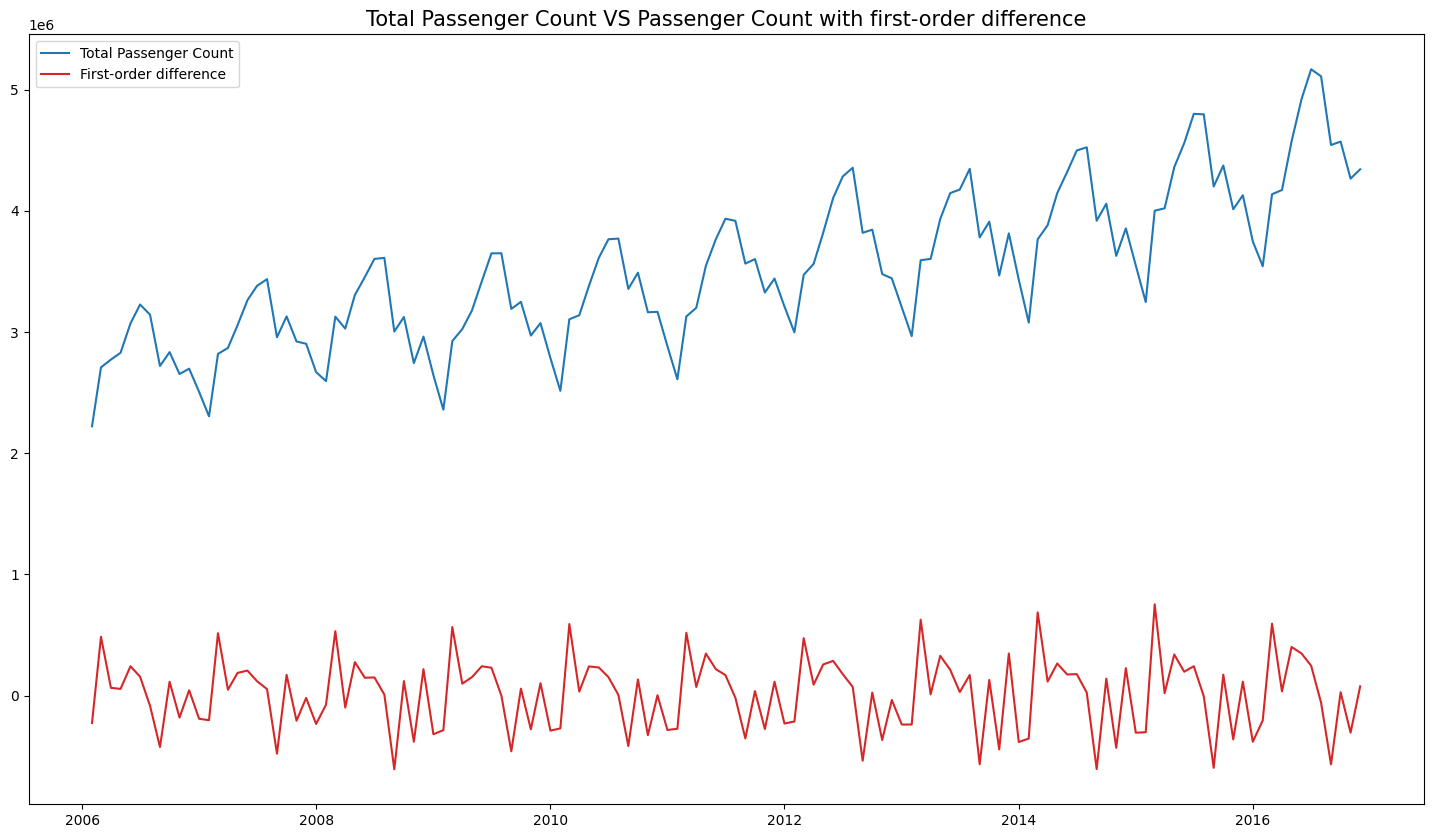

In [39]:
plt.figure(figsize= (18,10))

plt.plot(air_traffic_data['Total Passenger Count'], label='Total Passenger Count')
plt.plot(air_traffic_data['Difference'], label='First-order difference', color='tab:red')
plt.title('Total Passenger Count VS Passenger Count with first-order difference', size=15)
plt.legend()

##Check Stationarity


In [40]:
adf_result = adfuller(air_traffic_data['Difference'], autolag='AIC')
adf_result

(np.float64(-3.1275649315028806),
 np.float64(0.02457937946145964),
 12,
 118,
 {'1%': np.float64(-3.4870216863700767),
  '5%': np.float64(-2.8863625166643136),
  '10%': np.float64(-2.580009026141913)},
 np.float64(3013.039106024442))

ADF Test Statistic (-3.127565): This is a value calculated from the data after you took the first difference.
p-value (0.024579): This is a probability. A small p-value (typically less than 0.05) suggests that the data is likely stationary. Your p-value is 0.024579, which is less than 0.05.
Critical Values: These are threshold values. If your Test Statistic is smaller (more negative) than the critical value at a certain significance level (like 5%), it's considered strong evidence that the data is stationary. Your Test Statistic (-3.127565) is smaller than the 5% critical value (-2.8863625166643136).
Conclusion:

Based on both the p-value and the comparison of the Test Statistic to the Critical Values, the test result is "Reject Null Hypothesis - Time Series is Stationary".

This means that after taking the first difference of your air traffic data, the resulting time series is now considered stationary. In plain language, the first difference operation successfully removed the trend and made the data's statistical properties (like its mean and variance) more constant over time. This is important because many time series forecasting models work best with stationary data.



In [41]:
print('ADF Test Statistic: %f' % adf_result[0])

print('p-value: %f' % adf_result[1])

print('Critical Values:')

print(adf_result[4])

if adf_result[0] < adf_result[4]["5%"]:
    print ("Reject Null Hypothesis - Time Series is Stationary")
else:
    print ("Failed to Reject Null Hypothesis - Time Series is Non-Stationary")

ADF Test Statistic: -3.127565
p-value: 0.024579
Critical Values:
{'1%': np.float64(-3.4870216863700767), '5%': np.float64(-2.8863625166643136), '10%': np.float64(-2.580009026141913)}
Reject Null Hypothesis - Time Series is Stationary


Based on the results of the ADF test on the first-order difference of the air traffic data, here's what we get:

We've successfully transformed the original non-stationary air traffic data into a stationary time series by calculating the difference between consecutive data points.

This is important because:

Many time series models require stationarity: A lot of powerful time series forecasting techniques (like ARIMA models) assume that the data is stationary. By making the data stationary, we've prepared it for use with these models.
The trend has been removed: The first differencing step effectively removed the upward trend we saw in the original air traffic data. The differenced series now fluctuates around a constant mean (which is close to zero), without a clear long-term direction.
The data is easier to model: Stationary time series are simpler to analyze and model because their statistical properties are more predictable over time.
In short, by taking the first difference and confirming stationarity with the ADF test, we've created a time series that is more suitable for advanced time series analysis and forecasting methods. The "what we get" is a cleaner, more predictable version of the data that is ready for the next steps in building a forecasting model.

Augmented Dickey-Fuller (ADF) Test:

Think of the ADF test as a statistical tool that helps us figure out if a time series has a "unit root." A unit root is a characteristic that makes a time series non-stationary (meaning its statistical properties like mean and variance change over time).
The test essentially checks if the time series is random or if it has some predictable pattern that makes it non-stationary.
p-value:

The p-value is a probability. In the context of the ADF test, the p-value tells us the probability of observing the results we got (or something more extreme) if the time series were actually stationary (the null hypothesis).
If the p-value is small (usually less than 0.05): This means it's very unlikely to see our data if the time series were stationary. So, we "reject the null hypothesis" and conclude that the time series is likely non-stationary.
If the p-value is large (usually greater than 0.05): This means that our data is quite likely to be observed even if the time series were stationary. So, we "fail to reject the null hypothesis" and conclude that the time series is likely stationary.
In our previous analysis of the original air traffic data, the p-value was very high (0.989868). This told us that the original data was non-stationary.

After we took the first difference of the air traffic data, the p-value became small (0.024579). This told us that the differenced data was likely stationary.

In [42]:
from statsmodels.tsa.stattools import acf

acf_values = acf(air_traffic_data[['Total Passenger Count']],nlags = 24)
for i in range(0,25):
    print("Lag " ,i, " " , np.round(acf_values[i],2))

Lag  0   1.0
Lag  1   0.86
Lag  2   0.76
Lag  3   0.61
Lag  4   0.46
Lag  5   0.36
Lag  6   0.26
Lag  7   0.33
Lag  8   0.38
Lag  9   0.49
Lag  10   0.59
Lag  11   0.67
Lag  12   0.75
Lag  13   0.63
Lag  14   0.55
Lag  15   0.41
Lag  16   0.28
Lag  17   0.19
Lag  18   0.1
Lag  19   0.16
Lag  20   0.21
Lag  21   0.31
Lag  22   0.41
Lag  23   0.48
Lag  24   0.56


Autocorrelation Function (ACF) for the 'Total Passenger Count' with a maximum of 24 lags and display the results.

Now that we have the ACF values for the original non-stationary data, it would be beneficial to calculate the ACF for the stationary data (the 'Difference' column). This will help us identify potential parameters for time series models like ARIMA.

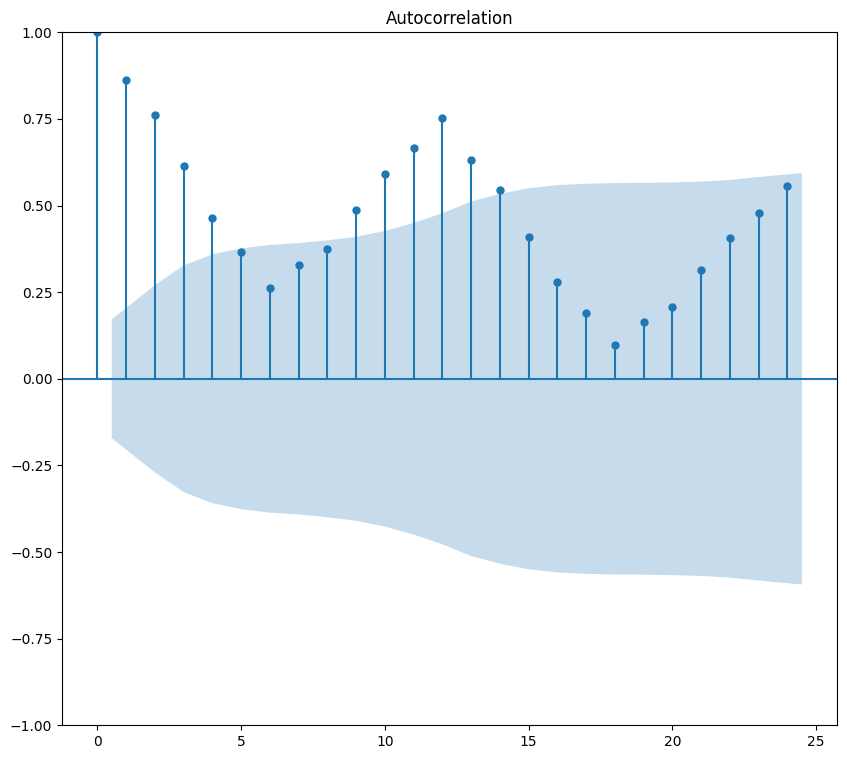

In [43]:
from statsmodels.graphics.tsaplots import plot_acf

fig= plot_acf(air_traffic_data['Total Passenger Count'],lags = 24)
fig.set_size_inches((10, 9))
plt.show()

Here's what you can observe:

High Autocorrelation at Small Lags: The bars at the beginning (small lags) are very high and gradually decrease. This indicates that consecutive data points, and data points close in time, are highly correlated with each other. This is typical for time series with a trend.
Slow Decay: The autocorrelation values decrease slowly as the lag increases, remaining significantly above the shaded blue region (which represents the confidence interval, indicating statistical significance). This slow decay is a strong indicator of a non-stationary time series, confirming what we found with the ADF test.
Seasonal Pattern: You can see a repeating pattern in the spikes, with notable peaks around lags 12 and 24. This confirms the strong seasonality we observed in the original time series plot. The passenger count is correlated with the passenger count from 12 months and 24 months prior.
In summary, this ACF plot visually reinforces that the original air traffic data is non-stationary due to the presence of a trend and strong seasonality. While it shows the clear seasonal pattern, the slow decay of the autocorrelation is characteristic of a non-stationary series. To determine appropriate parameters for time series models, we would typically examine the ACF and PACF of the stationary version of the data.

In [45]:
from statsmodels.tsa.stattools import pacf

pacf_values = pacf(air_traffic_data['Total Passenger Count'],nlags=24,method="ols")
for i in range(0,25):
    print("Lag " ,i, " " , np.round(pacf_values[i],2))

Lag  0   1.0
Lag  1   0.87
Lag  2   0.05
Lag  3   -0.24
Lag  4   -0.13
Lag  5   0.21
Lag  6   -0.04
Lag  7   0.75
Lag  8   0.19
Lag  9   0.4
Lag  10   0.1
Lag  11   0.43
Lag  12   0.74
Lag  13   -0.63
Lag  14   -0.19
Lag  15   -0.1
Lag  16   0.0
Lag  17   0.21
Lag  18   0.0
Lag  19   -0.04
Lag  20   0.32
Lag  21   0.06
Lag  22   0.24
Lag  23   0.1
Lag  24   0.12



What we get from this data (the PACF values for the original 'Total Passenger Count'):

Looking at the PACF values you calculated:

Lag 1 (0.87): There is a strong positive partial autocorrelation at lag 1. This indicates a significant direct relationship between the current passenger count and the passenger count from the previous month, even after accounting for the correlation at earlier lags.
Lag 2 (0.05): The partial autocorrelation drops significantly at lag 2 and is close to zero.
Other Lags: You see some notable partial autocorrelations at other lags, particularly at lag 7 (0.75), lag 9 (0.4), lag 11 (0.43), and lag 12 (0.74). The strong spike at lag 12 is again indicative of the strong yearly seasonality.
Interpretation for Non-Stationary Data: Like the ACF of non-stationary data, the PACF of non-stationary data can be difficult to interpret definitively for identifying ARIMA model parameters. The strong positive partial autocorrelation at lag 1 is often seen in time series with a trend. The spikes at seasonal lags (like 12) are also expected due to seasonality.
While these PACF values confirm the patterns we've already observed (a trend and seasonality), they are most useful for model identification when calculated on stationary data.


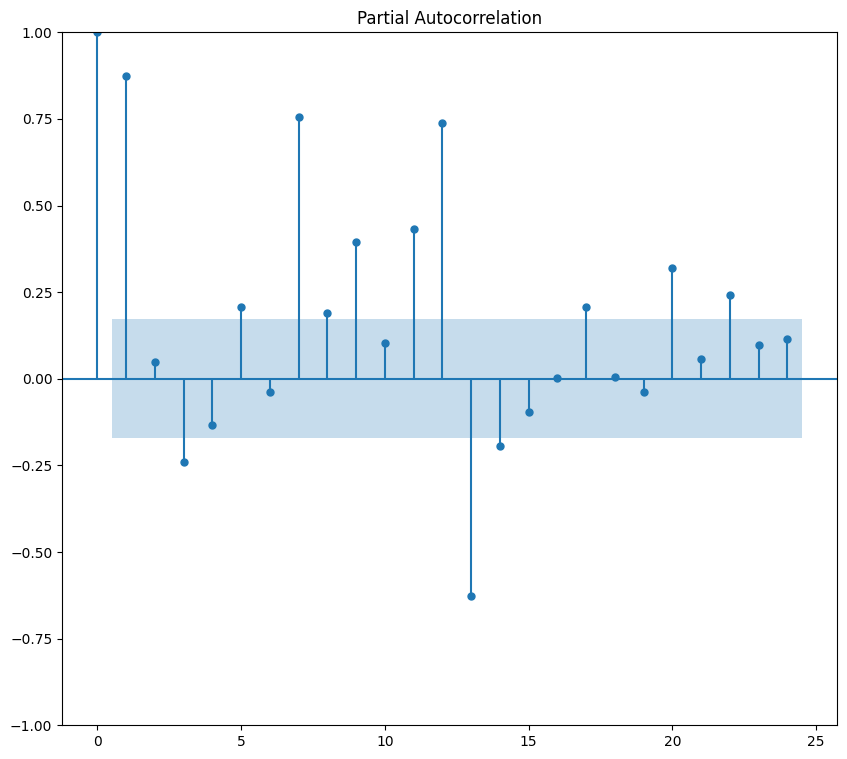

In [47]:
from statsmodels.graphics.tsaplots import plot_pacf

fig = plot_pacf(air_traffic_data['Total Passenger Count'],method = 'ols', lags=24)
fig.set_size_inches((10, 9))
plt.show()

San Francisco Air Traffic Data: We saw a clear upward trend in the total number of passengers over the years, with a strong pattern that repeats every year (seasonality). The data was not stationary, meaning its statistical properties changed over time, but we were able to make it stationary by looking at the difference in passenger numbers from one month to the next.
Delhi Weather Data: This data showed a very clear pattern that repeats each year (seasonality), with temperatures going up and down predictably with the seasons. Unlike the air traffic data, it didn't show a strong overall upward or downward trend over the years we looked at.
MTN Group Limited Stock Data: This data showed a lot of ups and downs (volatility) in the stock price over time, with periods of both increasing and decreasing prices. We used a moving average to smooth out the short-term fluctuations and see the general direction of the stock price. We also looked at the "residuals" (the difference between the actual price and the moving average) to see the short-term variations.
In simple terms, we've explored how these different types of data change over time, identified patterns like trends and seasonality, and looked at how to make data suitable for more advanced analysis (like making the air traffic data stationary).